**Make sure the runtime type is set to GPU**

So far, we have been loading pretrained models to classifiy our text. If we had our own dataset with text/label pairs we could create our own sequence classification model.

Here we will be loading an extral dataset as a CSV.

We will load in a dataset from a past Kaggle competition that tries to classifies sentences based on author.
https://www.kaggle.com/c/spooky-author-identification/data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
author = "/gdrive/My Drive/Data/spooky-author-identification/train.csv"

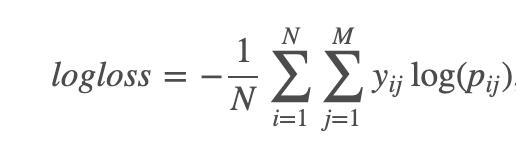

In [ ]:
import math

def logloss(df):
  n = len(df) # length of dataset
  m = len(df["label"].unique()) # number of classes

  text_list = df_val["text"].tolist() # text as a list
  label_list = df_val["label"].tolist() # labels as a list

  # model classifier
  sentences = classifier.tag_text(
      text_list,
      model_name_or_path="./models",
      mini_batch_size=1
  )

  # get predictions as list
  predictions = [[*map(lambda x: x.score, sentence.labels)] for sentence in sentences]

  # create tuple of answers and predictiosn
  t = [*zip(label_list, predictions)]

  def p(entry):
    index = entry[0] # index of correct probability
    return entry[1][index]

  logs = [math.log(p(entry)) for entry in t]

  return (-1)*(1/n)*(sum(logs))